# Cargar dataset

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Para que los datos no se corten y se vean todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# Cargar el dataset
df = pd.read_csv(r'C:\Users\jimen\OneDrive\Escritorio\Dataset.tsv', sep='\t')

# Mostrar primeras filas
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,diagnosis,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42
0,0.2419,0.14710,25.38,1001.0,202.21,Rural,0.05373,0.03003,1.0950,61.0,842302,0.04904,0.9053,0.006193,184.60,0.2654,Yes,0.08758,1,NaN,0.1622,M,0.07871,0.7119,0,17.33,0,never smoked,Female,0.27760,8.589,122.80,Self-employed,10.38,17.99,153.40,0.01587,2019.0,0.4601,0.006399,0.3001,0.11840,0.6656
1,0.1812,0.07017,24.99,1326.0,105.92,Rural,0.01860,0.01389,0.5435,80.0,842517,0.01308,0.7339,0.003532,158.80,0.1860,Yes,0.08758,3,32.5,0.1238,M,0.05667,0.2416,0,23.41,1,never smoked,Male,0.07864,3.398,132.90,Private,17.77,20.57,74.08,0.01340,1956.0,0.2750,0.005225,0.0869,0.08474,0.1866
2,0.2069,0.12790,23.57,1203.0,171.23,Urban,0.03832,0.02250,0.7456,49.0,84300903,0.04006,0.7869,0.004571,152.50,0.2430,Yes,0.08758,1,34.4,0.1444,M,0.05999,0.4504,0,25.53,0,smokes,Female,0.15990,4.585,130.00,Private,21.25,19.69,94.03,0.02058,1709.0,0.3613,0.006150,0.1974,0.10960,0.4245
3,0.2597,0.10520,14.91,386.1,174.12,Rural,0.05661,0.05963,0.4956,79.0,84348301,0.07458,1.1560,0.009208,98.87,0.2575,Yes,0.08758,0,24.0,0.2098,M,0.09744,0.6869,1,26.50,0,never smoked,Female,0.28390,3.445,77.58,Self-employed,20.38,11.42,27.23,0.01867,567.7,0.6638,0.009110,0.2414,0.14250,0.8663
4,0.1809,0.10430,22.54,1297.0,186.21,Urban,0.05688,0.01756,0.7572,81.0,84358402,0.02461,0.7813,0.005115,152.20,0.1625,Yes,0.08758,4,29.0,0.1374,M,0.05883,0.4000,0,16.67,0,formerly smoked,Male,0.13280,5.438,135.10,Private,14.34,20.29,94.44,0.01885,1575.0,0.2364,0.011490,0.1980,0.10030,0.2050


# Exploratory data analysis (EDA)

In [4]:
df.shape

(569, 43)

In [5]:
# Identificar las variables no numéricas 
df.dtypes

var_0        float64
var_1        float64
var_2        float64
var_3        float64
var_4        float64
var_5         object
var_6        float64
var_7        float64
var_8        float64
var_9        float64
var_10         int64
var_11       float64
var_12       float64
var_13       float64
var_14       float64
var_15       float64
var_16        object
var_17       float64
var_18         int64
var_19       float64
var_20       float64
diagnosis     object
var_22       float64
var_23       float64
var_24         int64
var_25       float64
var_26         int64
var_27        object
var_28        object
var_29       float64
var_30       float64
var_31       float64
var_32        object
var_33       float64
var_34       float64
var_35       float64
var_36       float64
var_37       float64
var_38       float64
var_39       float64
var_40       float64
var_41       float64
var_42       float64
dtype: object

In [6]:
# Ver los valores unicos de las variables no numéricas usando una función anónima lambda
df[['var_5','var_16','diagnosis','var_27','var_28','var_32']].apply(lambda x: x.unique()) 

var_5                                           [Rural, Urban]
var_16                                               [Yes, No]
diagnosis                                               [M, B]
var_27        [never smoked, smokes, formerly smoked, Unknown]
var_28                                          [Female, Male]
var_32       [Self-employed, Private, Govt_job, children, N...
dtype: object

In [7]:
# Ver si hay valores nulos en los datos
df.isnull().sum()

var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19       46
var_20        0
diagnosis     0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
dtype: int64

In [8]:
# Remplazar los valores nulos con la media de la columna
mean = df['var_19'].mean()
df['var_19'] = df['var_19'].replace(np.nan, mean)

In [9]:
# Cambiar la variable "Target" a una variable binaria 1/0
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df['diagnosis'] = df['diagnosis'].astype('int64')

In [10]:
# Cambiar otras variables no numéricas a valores numéricos
le = LabelEncoder()
df['var_16'] = le.fit_transform(df['var_16'])
df['var_27'] = le.fit_transform(df['var_27'])
df['var_28'] = le.fit_transform(df['var_28'])

In [11]:
df.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,diagnosis,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42
0,0.2419,0.14710,25.38,1001.0,202.21,Rural,0.05373,0.03003,1.0950,61.0,842302,0.04904,0.9053,0.006193,184.60,0.2654,1,0.08758,1,30.139006,0.1622,1,0.07871,0.7119,0,17.33,0,2,0,0.27760,8.589,122.80,Self-employed,10.38,17.99,153.40,0.01587,2019.0,0.4601,0.006399,0.3001,0.11840,0.6656
1,0.1812,0.07017,24.99,1326.0,105.92,Rural,0.01860,0.01389,0.5435,80.0,842517,0.01308,0.7339,0.003532,158.80,0.1860,1,0.08758,3,32.500000,0.1238,1,0.05667,0.2416,0,23.41,1,2,1,0.07864,3.398,132.90,Private,17.77,20.57,74.08,0.01340,1956.0,0.2750,0.005225,0.0869,0.08474,0.1866
2,0.2069,0.12790,23.57,1203.0,171.23,Urban,0.03832,0.02250,0.7456,49.0,84300903,0.04006,0.7869,0.004571,152.50,0.2430,1,0.08758,1,34.400000,0.1444,1,0.05999,0.4504,0,25.53,0,3,0,0.15990,4.585,130.00,Private,21.25,19.69,94.03,0.02058,1709.0,0.3613,0.006150,0.1974,0.10960,0.4245
3,0.2597,0.10520,14.91,386.1,174.12,Rural,0.05661,0.05963,0.4956,79.0,84348301,0.07458,1.1560,0.009208,98.87,0.2575,1,0.08758,0,24.000000,0.2098,1,0.09744,0.6869,1,26.50,0,2,0,0.28390,3.445,77.58,Self-employed,20.38,11.42,27.23,0.01867,567.7,0.6638,0.009110,0.2414,0.14250,0.8663
4,0.1809,0.10430,22.54,1297.0,186.21,Urban,0.05688,0.01756,0.7572,81.0,84358402,0.02461,0.7813,0.005115,152.20,0.1625,1,0.08758,4,29.000000,0.1374,1,0.05883,0.4000,0,16.67,0,1,1,0.13280,5.438,135.10,Private,14.34,20.29,94.44,0.01885,1575.0,0.2364,0.011490,0.1980,0.10030,0.2050


# Entrenamiento de modelo

([<matplotlib.axis.XTick at 0x22d90186f90>,
 [Text(0, 0, 'Benigno'), Text(1, 0, 'Maligno')])

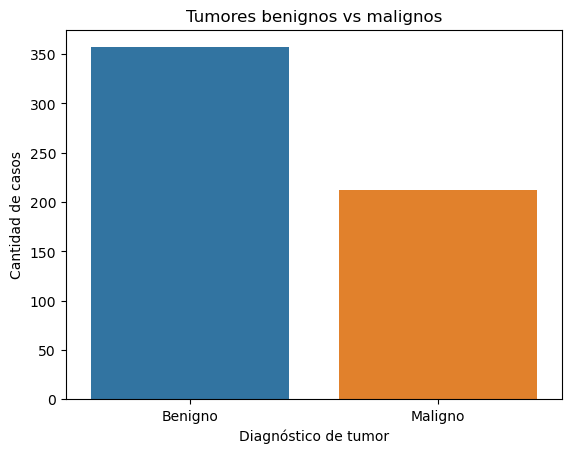

In [12]:
# Análisis de distribución de la variable "Target"
sns.countplot(x='diagnosis', data=df)

plt.xlabel('Diagnóstico de tumor')
plt.ylabel('Cantidad de casos')
plt.title('Tumores benignos vs malignos')
plt.xticks(ticks=[0,1], labels=['Benigno','Maligno'])

In [13]:
# Mismo análisis pero en %
print(df['diagnosis'].value_counts(normalize=True))

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


No es necesario aplicar oversampling dado que se suele aplicar técnicas como SMOTE cuando la variable inferior (Maligno) es menor del 20%. En este caso están balanceado los datos

## Selección de variables

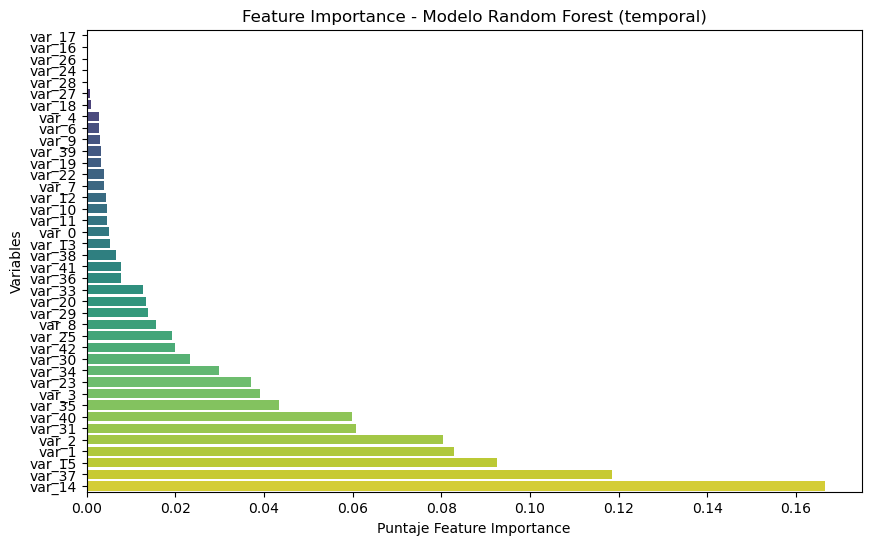

In [14]:
# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('diagnosis')

# Escalar datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# Entrenar un modelo Random Forest temporal para evaluar la importancia de las variables
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(df[numeric_cols], df['diagnosis'])

# Usar Feature Importante para identificar las variables mas importantes
feature_importance = pd.Series(rf_temp.feature_importances_, index=df[numeric_cols].columns)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.sort_values(), y=feature_importance.sort_values().index, palette='viridis')
plt.xlabel('Puntaje Feature Importance')
plt.ylabel('Variables')
plt.title("Feature Importance - Modelo Random Forest (temporal)")
plt.show()

In [15]:
# Seleccionar top 10 variables más importantes y guardar en top_features
top_features = df[['var_14','var_37','var_15','var_1','var_2','var_31','var_40','var_35','var_3','var_23']]

## Training y testing

In [16]:
X = top_features.values
Y = df['diagnosis'].values

# Dividir en training/testing sets de 80%-20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Modelo predictivo Random Forest

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



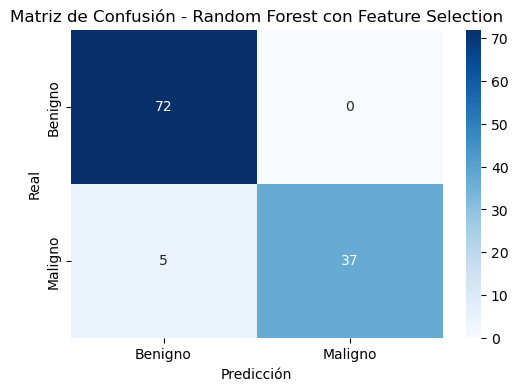

In [17]:
# Entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Predicciones y evaluacion
Y_predict = rf.predict(X_test)
print(classification_report(Y_test, Y_predict))

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest con Feature Selection')
plt.show()

# Conclusiones

- Se realizó un análisis exploratorio sobre el efecto de 43 variables en tumores malignos vs. benignos.

- Se seleccionaron las 10 variables más importantes usando Feature Selection para entrenar un modelo predictivo Random Forest.

- El modelo Random Forest logró una precisión de 94% (mide cuántos tumores malignos previstos eran en verdad tumores malignos), por tanto

- La matriz de confusión muestra que el modelo predijo correctamente 72 casos benignos y 37 casos malignos, con solo 5 falsos negativos (tumores malignos clasificados erróneamente como benignos) y 0 falsos positivos.  

- El modelo es preciso en la clasificación de tumores benignos, pero puede mejorarse en la detección de tumores malignos.

- Con más tiempo, se podrían aplicar mejoras como ajustar hiperparámetros, escoger más o menos variables del Feature Selection o experimentar con otros modelos predictivos como XGBoost o Redes Neuronales.